In [1]:
# Goal: Build a CNN that classifies digits (0–9)
# Target: >95% test accuracy
# ===============================================

# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2025-10-15 11:58:35.135131: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Step 2: Load and preprocess data
# -------------------------------
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN input (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Training samples: {x_train.shape[0]}")
print(f"Testing samples:  {x_test.shape[0]}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step
Training samples: 60000
Testing samples:  10000


In [3]:
# Step 3: Build CNN model
# -------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Show model summary
model.summary()

/home/lennoxlewis/.local/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-15 11:59:46.264276: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Step 4: Compile model
# -------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# Step 5: Train model
# -------------------------------
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=2
)


Epoch 1/5


2025-10-15 12:00:30.216146: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-10-15 12:01:35.529483: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 - 67s - 36ms/step - accuracy: 0.9587 - loss: 0.1362 - val_accuracy: 0.9829 - val_loss: 0.0563
Epoch 2/5
1875/1875 - 59s - 32ms/step - accuracy: 0.9856 - loss: 0.0469 - val_accuracy: 0.9851 - val_loss: 0.0452
Epoch 3/5
1875/1875 - 54s - 29ms/step - accuracy: 0.9898 - loss: 0.0328 - val_accuracy: 0.9891 - val_loss: 0.0316
Epoch 4/5
1875/1875 - 52s - 28ms/step - accuracy: 0.9920 - loss: 0.0240 - val_accuracy: 0.9895 - val_loss: 0.0335
Epoch 5/5
1875/1875 - 59s - 31ms/step - accuracy: 0.9941 - loss: 0.0177 - val_accuracy: 0.9908 - val_loss: 0.0306


In [6]:
# Step 6: Evaluate model
# -------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


✅ Test Accuracy: 99.08%


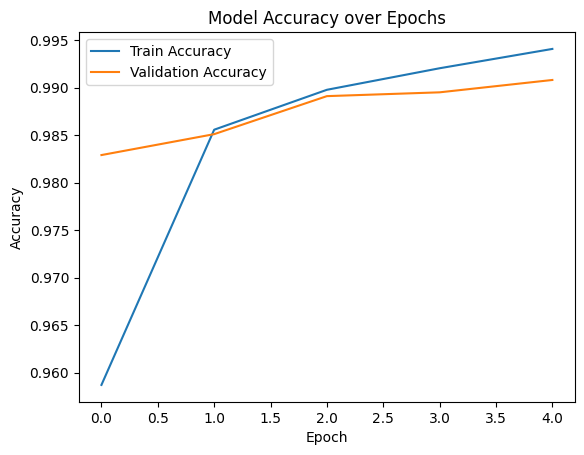

In [7]:
# Step 7: Visualize training performance
# -------------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


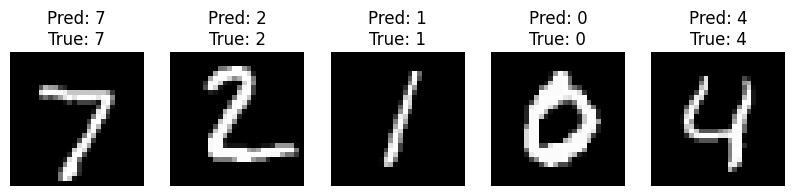

In [8]:
# Step 8: Visualize predictions on 5 test samples
# -------------------------------
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()